<a href="https://www.kaggle.com/code/larsmagnusson/itf31519-workshop-3-11-ff-on-image-data?scriptVersionId=152692422" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Load MNIST dataset directly from tensorflow
from tensorflow.keras.datasets.mnist import load_data
# Data is returned already split into train and test data, and inputs and outputs
(train_x, train_y), (test_x, test_y) = load_data()
# Show the contents of the training inputs
train_x

11501568/11490434 [==============================] - 0s 0us/step


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [3]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

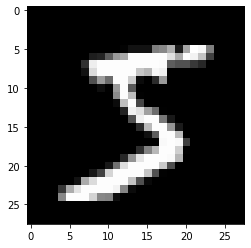

In [4]:
from matplotlib import pyplot as plt

print(train_x[0])
plt.imshow(train_x[0],cmap='gray')

In [5]:
# Normalize the input values 
train_x = train_x / 255.0
test_x = test_x / 255.0

import matplotlib.pyplot as plt

# Show the normalized trainining inputs
train_x[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

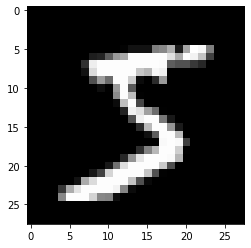

In [6]:
plt.imshow(train_x[0],cmap='gray')

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Create our model. A sequential model is a sequence of layers. 
model = Sequential()
# Flatten the input tensors
model.add(Flatten(input_shape=(28,28)))
# Fully-connected layer with 120 neurons
model.add(Dense(120, activation='sigmoid'))
# Dropout layer with 0.1 drop out ratio i.e. 10% of the inputs will randomly be set to 0
# Can reduce overfitting (increase regularization)
model.add(Dropout(0.1))
# Output layer with one neuron per class
model.add(Dense(10))

# Finish our model by specifying optimizer, loss function and metrics 
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train our network using 32 images between each weight update and run through all the data 5 times
model.fit(train_x, train_y, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4248 - accuracy: 0.8875
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2153 - accuracy: 0.9374
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1610 - accuracy: 0.9530
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1291 - accuracy: 0.9622
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1066 - accuracy: 0.9686


In [8]:
# Evaluate the performance on test data
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 1ms/step - loss: 0.1009 - accuracy: 0.9686


[0.10094312578439713, 0.9685999751091003]

In [9]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# A function for creating our model. The arguments are parameters the we want to be controllable
def create_model(drop_out):
    # The same architecture as before, but now the drop_out is controllable by the search
    model = Sequential([
          Flatten(input_shape=(28, 28)),
          Dense(128, activation='relu'),
          Dropout(drop_out),
          Dense(10)
    ])
    # Finish the model by specifying optimizer, loss, and metric
    model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    return model

# Create our classifier that points to the function above
classifier = KerasClassifier(create_model, epochs=5, batch_size=32)

# Set up grid search like normal
params = {'drop_out':[0.1, 0.2, 0.3]}
grid = GridSearchCV(classifier, params,cv=3)
grid.fit(train_x, train_y)

Epoch 1/5
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3297 - accuracy: 0.9050
Epoch 2/5
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1563 - accuracy: 0.9543
Epoch 3/5
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1116 - accuracy: 0.9668
Epoch 4/5
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0853 - accuracy: 0.9742
Epoch 5/5
625/625 [==============================] - 1s 2ms/step - loss: 0.1071 - accuracy: 0.9683
Epoch 1/5
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3148 - accuracy: 0.9095
Epoch 2/5
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1497 - accuracy: 0.9559
Epoch 3/5
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1064 - accuracy: 0.9683
Epoch 4/5
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0824 - accuracy: 0.9747
Epoch 5/5
625/625 [==============================] - 1s 1ms/step - loss: 0.1046 - accuracy: 0

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7ad9cbc8e5d0>,
             param_grid={'drop_out': [0.1, 0.2, 0.3]})

In [10]:
import keras_tuner

# A function for creating our model. 
def create_model1(hp):
    # The same architecture as before, but now the drop_out is controllable by the search
    model = Sequential([
          Flatten(input_shape=(28, 28)),
          Dense(128, activation='relu'),
          Dropout(hp.Float('drop_out', min_value=0.1, max_value=0.3, step=0.1)),
          Dense(10)
    ])
    # Finish the model by specifying optimizer, loss, and metric
    model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    return model

tuner = keras_tuner.RandomSearch(create_model1,objective='val_loss',max_trials=5,overwrite=True)
tuner.search(train_x[:10000],train_y[:10000],validation_data=(train_x[10000:],train_y[10000:]),epochs=5,batch_size=32)
best = tuner.get_best_models()[0]
best

Trial 3 Complete [00h 00m 14s]
val_loss: 0.18964791297912598

Best val_loss So Far: 0.18268074095249176
Total elapsed time: 00h 00m 49s
